# Intro to Cell Annotation Schema
## AnnData limitations
<img width="898" alt="image" src="https://github.com/user-attachments/assets/e2263028-fb23-4dda-a231-65ee1434b5e6" />

Additional metadata about annotations is typically stored in a spreadsheet published as supplementary material.  This is often not in-sync with h5ad files available for the same publication.  It would be much better if we could store this information in the h5ad file itself.

## CAS Solution

The [Cell Annotation Schema](https://github.com/Cellular-Semantics/cell-annotation-schema) (CAS) is a solution for

   -  storing author metadata about annotations (unformalised)
   -  formalising links between individual annotations and cell ontology terms and between annotations supporting evidence for those annotations (e.g. markers)

The formal component includes extensions for specific projects, including the Cell Annotation Platform and the Brain Initiative Cell Atlas Network.  The latter supports IDs for annotations and recording annotation heirarchies: nested sets of annotated cells and their metadata.

The full schema is encoded as LinkML, which supports various different outputs including JSON schema, Python Data Classes, and RDF for loading into knowledge graphs.

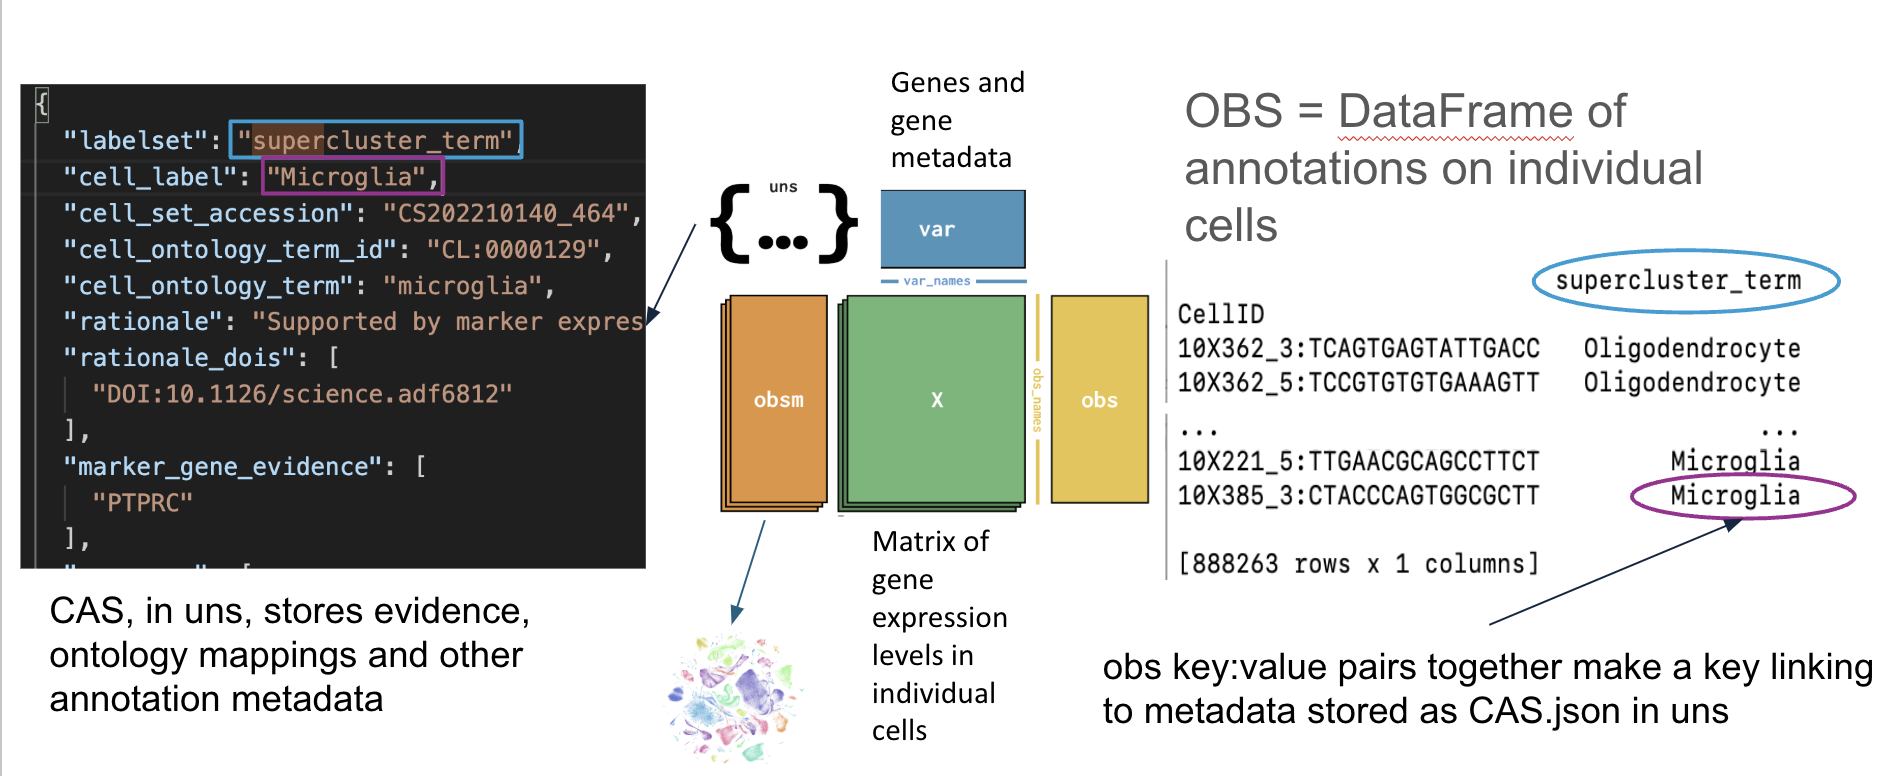

CAS, combined with the cas-tools library, offers a compact, non-redundant solution to storing annotation metadata in JSON - which may be stored in an h5ad file header (under `uns`) with an option to store sperately as JSON.  It has a set of standard fields for recording cell type using the Cell Ontology, recording evidence for annotation in the form of markers sets, free text, supporting references and annotation transfer. It also supports author categories.

CAS-tools is a python library that makes it easy to generate CAS JSON from various sources, manipulate it, merge it into h5ad files, generate DataFrame reports and save it to other formats (including CAP h5ad).

## Illustrating CAS utility with a pre-rolled example

The Cellular Semantics group at the Sanger hosts a number of pre-rolled CAS 'taxonomies' for Brain-related datasets.  These can be browsed at the [Cellular Semantics Taxonomy Catalog](https://cellular-semantics.sanger.ac.uk/tdt/catalog).

For demo perposes we will focus on an h5ad file of Cerebellar glutamatergic neurons (Class: 29 CB Glut) from 

Yao, Zizhen, Cindy T. J. van Velthoven, Michael Kunst, Meng Zhang, Delissa McMillen, Changkyu Lee, Won Jung, et al. 2023. “A High-Resolution Transcriptomic and Spatial Atlas of Cell Types in the Whole Mouse Brain.” Nature 624 (7991): 317–32. https://doi.org/10.1038/s41586-023-06812-z

This can also be viewed on the [Allen Brain Cell Atlas](https://knowledge.brain-map.org/abcatlas)


In [2]:
# Pulling the h5ad file

!wget -N http://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad

--2025-03-20 12:13:16--  http://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad
Resolving cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)... 193.62.203.62, 193.62.203.63, 193.62.203.61
connected. to cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)|193.62.203.62|:80... 
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad [following]
--2025-03-20 12:13:17--  https://cellular-semantics.cog.sanger.ac.uk/public/merged_CS20230722_CLAS_29.h5ad
Connecting to cellular-semantics.cog.sanger.ac.uk (cellular-semantics.cog.sanger.ac.uk)|193.62.203.62|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘merged_CS20230722_CLAS_29.h5ad’ not modified on server. Omitting download.



In [9]:
# Open anndata file in read only "backed" mode for memory efficiency

import anndata as ad

CB_glut = ad.read_h5ad('merged_CS20230722_CLAS_29.h5ad', backed="r")


In [10]:
CB_glut.obs.columns

Index(['cell_barcode', 'library_label', 'tissue', 'tissue_ontology_term_id',
       'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster',
       'organism', 'disease', 'assay'],
      dtype='object')

In [11]:
CB_glut.obs[0:5]

,cell_barcode,library_label,tissue,tissue_ontology_term_id,neurotransmitter,class,subclass,supertype,cluster,organism,disease,assay
cell_label,,,,,,,,,,,,
AAACCCAAGAACAAGG-472_A05,AAACCCAAGAACAAGG,L8TX_201217_01_G07,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v2
AAACCCAAGAATCCCT-473_A06,AAACCCAAGAATCCCT,L8TX_201217_01_A08,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v3
AAACCCAAGACTACCT-225_A01,AAACCCAAGACTACCT,L8TX_200227_01_F10,Medulla,UBERON:0001896,Glut,29 CB Glut,314 CB Granule Glut,1154 CB Granule Glut_1,5197 CB Granule Glut_1,Mus musculus,normal,10x 3' v2
AAACCCAAGAGCTGAC-231.2_B01,AAACCCAAGAGCTGAC,L8TX_200306_01_H12,Medulla,UBERON:0001896,Glut,29 CB Glut,314 CB Granule Glut,1154 CB Granule Glut_1,5197 CB Granule Glut_1,Mus musculus,normal,10x 3' v3
AAACCCAAGAGGACTC-478_A02,AAACCCAAGAGGACTC,L8TX_210107_02_H11,Cerebellum,UBERON:0002037,Glut,29 CB Glut,314 CB Granule Glut,1155 CB Granule Glut_2,5201 CB Granule Glut_2,Mus musculus,normal,10x 3' v2


The columns: class, subclass, supertype, cluster all contain annotations about the type and properties of individual cells. CAS JSON, stored in `uns` includes metadata about these annotations.

If you are comfortable with working with JSON, you *could* access it directly from 'uns', e.g. 

In [26]:
import json
json.loads(CB_glut.uns['cas'])['annotations'][1]

{'labelset': 'subclass',
 'cell_label': '314 CB Granule Glut',
 'cell_set_accession': 'CS20230722_SUBC_314',
 'cell_ontology_term_id': 'CL:0001031',
 'cell_ontology_term': 'cerebellar granule cell',
 'parent_cell_set_accession': 'CS20230722_CLAS_29',
 'author_annotation_fields': {'neighborhood': 'NN-IMN-GC',
  'subclass.tf.markers.combo': 'Pax6,Neurod2,Etv1',
  'subclass.markers.combo': 'Gabra6,Ror1',
  'supertype.markers.combo _within subclass_': 'None',
  'supertype.markers.combo': 'None',
  'anatomical_annotation': 'None',
  'merfish.markers.combo': 'None',
  'cluster.TF.markers.combo': 'None',
  'cluster.markers.combo _within subclass_': 'None',
  'cluster.markers.combo': 'None'}}

But CAS tools includes convenience methods unpacking CAS from JSON or straight from an h5ad file

In [4]:
# Loading CAS from header
from cas.reports import get_all_annotations
from cas.file_utils import read_cas_json_file, read_cas_from_anndata
cas = read_cas_from_anndata('./merged_CS20230722_CLAS_29.h5ad')

In [5]:
# Get metadata about a single annotation
cas.get_all_annotations(labels = [('subclass', '314 CB Granule Glut')])

,labelset,cell_label,cell_set_accession,cell_fullname,cell_ontology_term_id,cell_ontology_term,rationale,rationale_dois,marker_gene_evidence,synonyms,...,author_annotation_fields.neighborhood,author_annotation_fields.subclass.tf.markers.combo,author_annotation_fields.subclass.markers.combo,author_annotation_fields.supertype.markers.combo _within subclass_,author_annotation_fields.supertype.markers.combo,author_annotation_fields.anatomical_annotation,author_annotation_fields.merfish.markers.combo,author_annotation_fields.cluster.TF.markers.combo,author_annotation_fields.cluster.markers.combo _within subclass_,author_annotation_fields.cluster.markers.combo
1,subclass,314 CB Granule Glut,CS20230722_SUBC_314,None,CL:0001031,cerebellar granule cell,None,None,None,None,...,NN-IMN-GC,"Pax6,Neurod2,Etv1","Gabra6,Ror1",None,None,None,None,None,None,None


In [6]:
# View all annotations
cas.get_all_annotations()

,labelset,cell_label,cell_set_accession,cell_fullname,cell_ontology_term_id,cell_ontology_term,rationale,rationale_dois,marker_gene_evidence,synonyms,...,author_annotation_fields.neighborhood,author_annotation_fields.subclass.tf.markers.combo,author_annotation_fields.subclass.markers.combo,author_annotation_fields.supertype.markers.combo _within subclass_,author_annotation_fields.supertype.markers.combo,author_annotation_fields.anatomical_annotation,author_annotation_fields.merfish.markers.combo,author_annotation_fields.cluster.TF.markers.combo,author_annotation_fields.cluster.markers.combo _within subclass_,author_annotation_fields.cluster.markers.combo
0,class,29 CB Glut,CS20230722_CLAS_29,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,None,None,None,None,None
1,subclass,314 CB Granule Glut,CS20230722_SUBC_314,None,CL:0001031,cerebellar granule cell,None,None,None,None,...,NN-IMN-GC,"Pax6,Neurod2,Etv1","Gabra6,Ror1",None,None,None,None,None,None,None
2,subclass,315 DCO UBC Glut,CS20230722_SUBC_315,None,CL:4023161,unipolar brush cell,None,None,None,None,...,NN-IMN-GC,"Eomes,Lmx1a,Klf3","Sln,Lmx1a",None,None,None,None,None,None,None
3,supertype,1154 CB Granule Glut_1,CS20230722_SUPT_1154,None,None,None,None,None,None,None,...,None,None,None,Cntn3,"Gabra6,Lmx1a",None,None,None,None,None
4,supertype,1155 CB Granule Glut_2,CS20230722_SUPT_1155,None,None,None,None,None,None,None,...,None,None,None,Gap43,"Gabra6,Gap43,Rab37",None,None,None,None,None
5,supertype,1156 DCO UBC Glut_1,CS20230722_SUPT_1156,None,None,None,None,None,None,None,...,None,None,None,Sln,"Sln,Lmx1a",None,None,None,None,None
6,cluster,5197 CB Granule Glut_1,CS20230722_CLUS_5197,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Col27a1,Barhl1,St18,Trhde,Spon1,Syt6","Lmx1a,Zic1,St18","Lmx1a,Rnf182","Gabra6,Lmx1a,Rnf182"
7,cluster,5198 CB Granule Glut_1,CS20230722_CLUS_5198,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Svep1,Slc17a7,Chrm2","Pax6,Neurod2,Etv1,Bcl11b",Cntn5,"Gabra6,Cntn5"
8,cluster,5199 CB Granule Glut_1,CS20230722_CLUS_5199,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,DCO VCO,"Eomes,Col27a1,Calb2","Eomes,Lmx1a,Nr2f2,Lin28b",Rgs6,"Cbln3,Tmem132d"
9,cluster,5200 CB Granule Glut_2,CS20230722_CLUS_5200,None,None,None,None,None,None,None,...,NN-IMN-GC,None,None,None,None,NOD PFL,"Eomes,Svep1,Ntng1,Medag","Eomes,St18,En2,Nr4a2","Gap43,Kcnq5","Gabra6,Gap43,Il1rap"


In [7]:
## CAS also includes general metada about labelsets
import pandas as pd
pd.DataFrame(cas.labelsets)


,name,description,annotation_method,automated_annotation,rank
0,class,The top level of cell type definition in the m...,None,None,3
1,subclass,The coarse level of cell type definition in th...,None,None,2
2,supertype,The second finest level of cell type definitio...,None,None,1
3,cluster,The finest level of cell type definition in th...,None,None,0


## Rendering annotation metadata on the UMAP

To orientate ourselves, lets render the UMAP by supertype

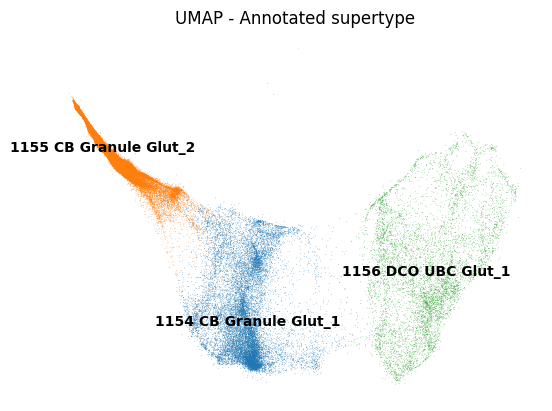

In [18]:
import scanpy as sc
CB_glut.obsm['umap']= CB_glut.obsm['X_UMAP'] # Needed to fit scanpy defaults

# Visualize the UMAP with annotated clusters
# Assuming your cluster annotations are stored in adata.obs["clusters"] (replace with your key)
sc.pl.umap(
    CB_glut,
    color="supertype",  # Replace "clusters" with the actual key for your annotations
    legend_loc="on data",  # Display legend on the plot
    title="UMAP - Annotated supertype",
    frameon=False  # No frame around the plot
)


In [ ]:
### Render by annotated brain region

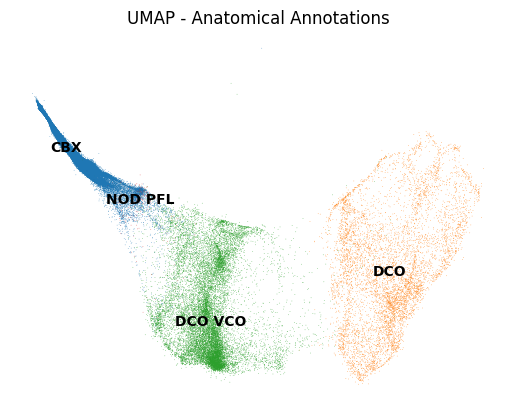

Cell counts by anatomical region:
anatomical_region
CBX        115909
DCO VCO     17649
DCO          7328
NOD PFL       220
Name: count, dtype: int64


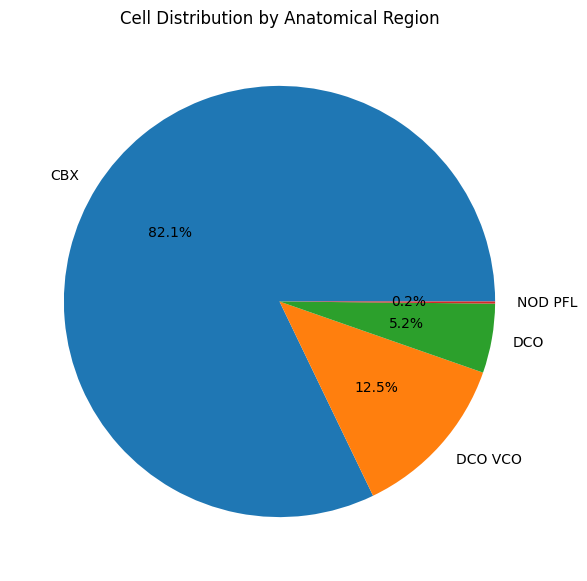

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the anndata file
CB_glut.obsm['umap'] = CB_glut.obsm['X_UMAP']  # Ensure UMAP coords use scanpy default name

# Load CAS data
from cas.reports import get_all_annotations
from cas.file_utils import read_cas_from_anndata
cas = read_cas_from_anndata('./merged_CS20230722_CLAS_29.h5ad')

# Get all annotations and extract the anatomical annotations
annotations_df = cas.get_all_annotations()

# Create a mapping from cell_set_accession to anatomical annotation
anat_annotations = {}
for _, row in annotations_df.iterrows():
  cell_set_id = row['cell_set_accession']
  anat_value = row['author_annotation_fields.anatomical_annotation']
  if anat_value is not None and cell_set_id is not None:
      anat_annotations[cell_set_id] = anat_value

# Create a mapping from cluster to anatomical annotation
cluster_to_anat = {}
for _, row in annotations_df.iterrows():
  if row['labelset'] == 'cluster':
      cluster_id = row['cell_label']
      anat_value = row['author_annotation_fields.anatomical_annotation']
      if anat_value is not None:
          cluster_to_anat[cluster_id] = anat_value

# Add anatomical annotations to observation DataFrame
CB_glut.obs['anatomical_region'] = CB_glut.obs['cluster'].map(cluster_to_anat)

# Display UMAP colored by anatomical annotations
sc.pl.umap(
  CB_glut,
  color="anatomical_region",
  title="UMAP - Anatomical Annotations",
  legend_loc="on data",
  frameon=False
)

# Count cells by anatomical region
region_counts = CB_glut.obs['anatomical_region'].value_counts()
print("Cell counts by anatomical region:")
print(region_counts)

# Create a pie chart of cell distribution by anatomical region
plt.figure(figsize=(10, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Cell Distribution by Anatomical Region')
plt.show()
